<a href="https://www.kaggle.com/code/wesleysilvaalves/projeto-ii-aplica-o-de-big-data-19375?scriptVersionId=95155000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center>
  <img src="https://drive.google.com/uc?export=view&id=1JchGEWu8SdqNQoOHtegCGpNOVBAHx342" >
</center>

<p style="text-align:center;font-size:32px">Análise Classificatória de Dígitos Manuscritos com o Dataset MNIST</p>

<center>
    <img src="https://miro.medium.com/max/980/1*Riqqoa7vKHXnFHvaGfDFjA.png">
</center>


 <p style="text-align:center;font-size:32px">Este projeto tem como objetivo demonstrar a acurácia classificatória dos algoritmos de redes neurais em imagens de digitos manuscritos.</p>



<h1 style="text-align: center;"><strong>Especifica&ccedil;&otilde;es T&eacute;cnicas</strong></h1>
<p style="font-size: 22px;"><strong> O Dataset </strong></p>
<p>&nbsp; &nbsp; Neste projeto foi utilizado o dataset <strong>MNIST</strong>(Modified National Institute of Standards and technology),sendo este um banco de dados criado em 1998, pela jun&ccedil;&atilde;o de 2 datasets, que foram criados a partir da escrita manual de estudantes do ensino m&eacute;dio e de funcion&aacute;rios do Departamento de Censo dos Estados Unidos.</p>
<p>A base de dados se encontra no formato <strong>CSV</strong> (Comma-separeted values), e possui 70 mil imagens, dividida em duas partes,contendo 60 mil e 10 mil respectivamente, as imagens possuem a dimens&atilde;o de 28 por 28 pixels e est&atilde;o disponibilizadas de forma flatten (achatada) em 784 c&eacute;lulas, com valores entre 0 e 255.</p>
<p style="font-size: 22px;"><strong> Metodologia </strong></p>
<p>&nbsp; &nbsp; O Dataset ser&aacute; divido em 3 partes, deixando 48 mil imagens para treino, 12 mil para testes e 10 mil para valida&ccedil;&atilde;o. as imagens ser&atilde;o normalizadas, reduzindo seus valores para a escala entre 0 e 1, e as estiquetas ser&atilde;o convertidas utilizando o met&oacute;do <strong>One Hot Enconder</strong> para melhor aproveitamento dos algoritmos.</p>
<p>Os algoritmos utilizados neste projeto s&atilde;o:</p>
<ul>
<li><strong>MLPClassifier</strong> - Perceptron Multicamadas da biblioteca Scikit-Learn</li>
<li><strong>SimpleRNN</strong> - Rede neural recorrente da biblioteca biblioteca TensorFlow Keras</li>
<li><strong>Conv2D</strong> - rede neural convolucional da biblioteca TensorFlow Keras</li>
</ul>
<p>A metrica de avalia&ccedil;&atilde;o desse projeto foi definida como <strong>acur&aacute;cia</strong>,que &eacute; a quantidade classificada como Positivos e Negativos corretamente.</p>

<left>
    <img src="https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png">
</left>

# **Importação de bibliotecas e funções**

In [1]:
import keras
from keras.utils.np_utils import to_categorical # converte para forma binária
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from numpy import argmax # retorna de binário para o estado natural
from keras import Sequential #função para criar camadas
import tensorflow as tf
from keras.layers import SimpleRNN, Conv2D, Lambda, MaxPooling2D # 
from keras.layers import Dense, Dropout, Flatten # Camadas
from keras.layers import BatchNormalization
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier #algoritmo de classificação
from sklearn.model_selection import cross_val_score, train_test_split #divisores do dataset
import warnings;warnings.filterwarnings('ignore') # ignora avisos para o usuário

In [2]:
#checa a matriz de confusão e métricas
def check(true, pred):
    cm = confusion_matrix(true,pred)
    disp = ConfusionMatrixDisplay(cm)
    fig,ax = plt.subplots(figsize=(10,10))
    disp.plot(ax = ax,cmap='Blues')
    plt.title('Matriz de Confusão', fontsize=18)
    plt.xlabel('Dígito Previsto', fontsize=16)
    plt.ylabel('Dígito Real', fontsize=16)
    plt.show()
    report= classification_report(true, pred)# verifica metricas
    print(report)


# **Importação do Dataset**

In [3]:
#importação do dataset em duas parte, já deixando separado uma parte para validação
df = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv', header=None)
val = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv', header=None)
print('O Dataset foi importado com sucesso!')

O Dataset foi importado com sucesso!


In [4]:
# verificando o tamanho do dataframe
print('O tamanho do dataframe é de',df.shape[0],'linhas por',df.shape[1],'colunas', 
      'e a validação será de', val.shape[0],'unidades',)
# verificando a existencia de valores nulos
print('existe', df.isnull().sum().sum(),'valores nulos no Dataframe') 
print('existe', val.isnull().sum().sum(),'valores nulos para validação')


O tamanho do dataframe é de 60000 linhas por 785 colunas e a validação será de 10000 unidades
existe 0 valores nulos no Dataframe
existe 0 valores nulos para validação


# **Visualizando o Dataset**

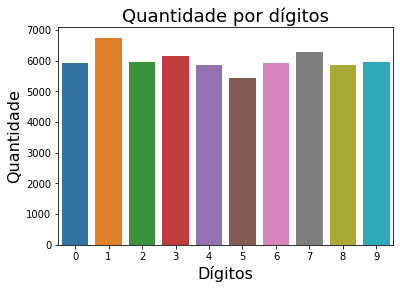

In [5]:
#Visualizando dataframe
sns.countplot(data=df, x=0)
plt.title('Quantidade por dígitos', fontsize=18)
plt.xlabel('Dígitos', fontsize=16)
plt.ylabel('Quantidade', fontsize=16)
plt.show()

não existe muitas diferenças entre a quantidade de números, sendo assim não será necessário alterar a quantidade de cada um.

# **Pré-processamento dos dados**

Nesta fase será feita a normalização da escala de cinza dos dados, convertendo os valores de entre 0 e 255 para entre 0 e 1, facilitando o treino dos algoritmos, e também separaremos as labels (etiquetas).


In [6]:
x = (df.iloc[:,1:].values).astype('float32')# imagens
y = (df.iloc[:,0].values).astype('int32')# labels
x_val = (val.iloc[:,1:].values).astype('float32')#imagens para validação
y_val = (val.iloc[:,0].values).astype('int32')#etiquetas de validação
x = x / 255.0 #normalização
x_val = x_val / 255.0

# **Visualização dos Dígitos**

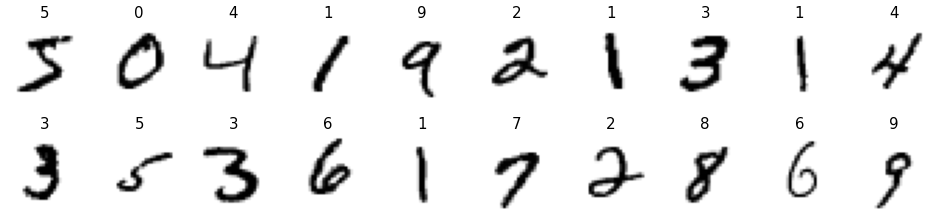

In [7]:
#visualizando os 20 primeiros dígitos e suas etiquetas
plt.figure(figsize=(16,4), dpi=60)
a,b = 10,2
for i in range(20):
  plt.subplot(b,a,i+1)
  plt.imshow(x[i].reshape((28,28)), cmap='binary')
  plt.title(y[i], fontsize=18)
  plt.axis('off')
  plt.tight_layout(pad=2.0)
plt.show()

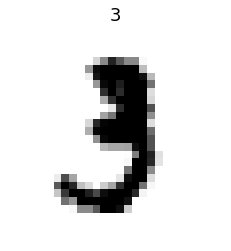

In [8]:
#visualizando um número mais de perto
plt.imshow(x[10].reshape((28,28)), cmap='binary')
plt.title(y[10], fontsize=18)
plt.axis('off')
plt.show()

# **Divisão do Dataset**
O Dataset será dividido em 80% para treino dos dados e 20% para teste,
aqui nesta fase, também faremos a binarização das labels.
Exemplo.  2 --> [0,0,1,0,0,0,0,0,0,0])

In [9]:
print('Exemplo de uma label em sua forma normal:',y[10])
y = to_categorical(y, num_classes=10)#tconvertendo para binários com 10 posições possíveis
print('Exemplo de uma label após a transformação:',y[10])

Exemplo de uma label em sua forma normal: 3
Exemplo de uma label após a transformação: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [10]:
#dividindo o dataset em treino e teste
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)
print('o dataframe foi dividido em {}% para treino e {}% para testes.'.format(
    round(len(x_train)/len(x)*100), round(len(x_test)/len(x)*100)))

o dataframe foi dividido em 80% para treino e 20% para testes.


# **Testando Algoritmos**
será criado 3 modelos para cada um dos algoritmos previamente escolhidos, todos serão testados e validados separadamente.

# **Modelo 1 - Perceptron de Multicamada**

In [11]:
#criando o modelo
modelo_1 = MLPClassifier(hidden_layer_sizes=(150,100,50),#quantidades de camadas
                         max_iter=300,# máximo número de iterações
                         activation = 'relu', #modo de ativação
                         solver = 'adam', #otimizador
                         random_state=42) # mantém o estado randomico

In [12]:
# testando possiveis overfitting com o cross_val_score
cv = cross_val_score(modelo_1,
                     x_train,#imagens 
                     y_train,#etiquetas
                     cv=5)#dividindo em 5 partes
print(cv)

[0.96625    0.96947917 0.96916667 0.96739583 0.96958333]


Como visto, nesses parametros não ouve nenhum over,sendo assim, o algoritmo será treinado agora.

In [13]:
%%time
modelo_1.fit(x_train,y_train)#treina
pred_1 = modelo_1.predict(x_test)#prediz as labels das imagens
pred_1 = argmax(pred_1, axis=1);y_test = argmax(y_test, axis=1)#retorna as etiquetas para o estado nao binário

CPU times: user 1min 34s, sys: 29.4 s, total: 2min 3s
Wall time: 1min 6s


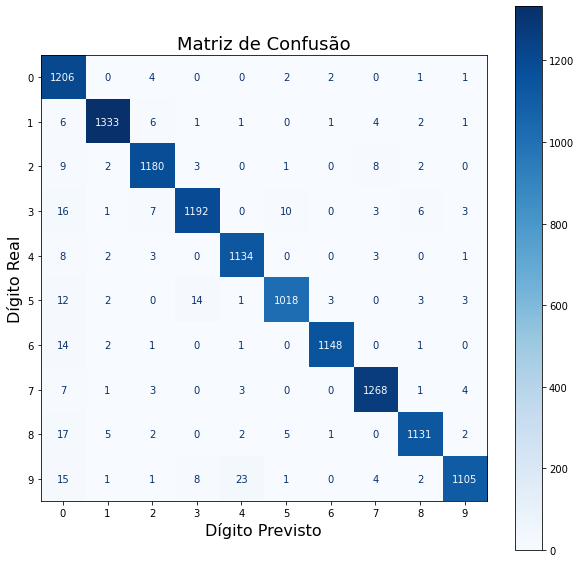

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1216
           1       0.99      0.98      0.99      1355
           2       0.98      0.98      0.98      1205
           3       0.98      0.96      0.97      1238
           4       0.97      0.99      0.98      1151
           5       0.98      0.96      0.97      1056
           6       0.99      0.98      0.99      1167
           7       0.98      0.99      0.98      1287
           8       0.98      0.97      0.98      1165
           9       0.99      0.95      0.97      1160

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [14]:
# plotando a confusion matrix
check(y_test,pred_1)

Nos testes foi alcançada uma acurácia de 97% e o maior erro em precisão de Zero, sendo 93%

# Validação do Modelo 1

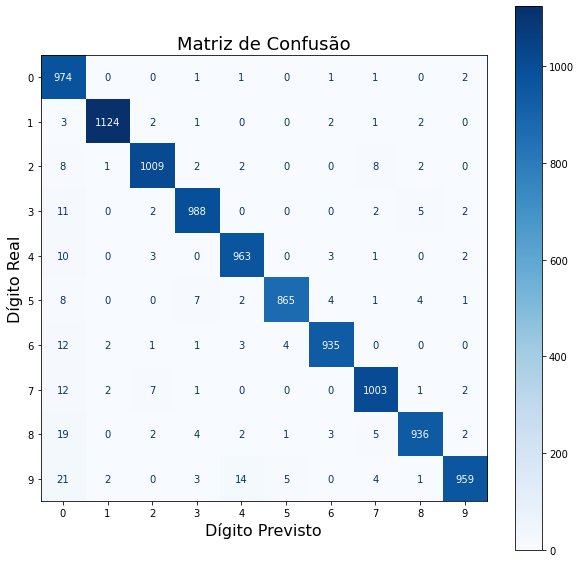

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
val_1 = modelo_1.predict(x_val)
val_1 = argmax(val_1, axis=1)
check(y_val, val_1)


O algoritmo também mostrou uma alta acurácia na validação(97%), tendo sua pontuação mais baixa a precisão do numéro Zero que chegou aos 92%.

# **Modelo 2 - Rede Neural Recorrente**

In [16]:
#criando um earlystop, para evitar computação desnecessária.
stop_rnn = keras.callbacks.EarlyStopping(
    monitor='loss', # por loss
    patience = 2, # terminar o treino após duas épocas sem melhoras
    verbose = 1, #modo verbose ligado
    mode='min',
)

In [17]:
# iniciando o algoritmo
model_2 = Sequential()
model_2.add(SimpleRNN(64,#camadas 
                      input_shape=(28,28),#formato
                      activation ='relu'))#ativação 
model_2.add(Dense(units=10, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['acc'])


2022-05-09 13:14:26.697501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 13:14:26.814226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 13:14:26.815032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 13:14:26.816279: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
#treinando o modelo com 20 epocas
model_2.fit(x_train.reshape(-1,28,28), y_train, epochs=40, callbacks=stop_rnn) 

2022-05-09 13:14:29.576837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
1500/1500 [==============================] - 19s 12ms/step - loss: 0.6528 - acc: 0.7883
Epoch 2/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2898 - acc: 0.9156
Epoch 3/40
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2323 - acc: 0.9326
Epoch 4/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2036 - acc: 0.9406
Epoch 5/40
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1845 - acc: 0.9464
Epoch 6/40
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1686 - acc: 0.9516
Epoch 7/40
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1548 - acc: 0.9547
Epoch 8/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1498 - acc: 0.9564
Epoch 9/40
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1392 - acc: 0.9593
Epoch 10/40
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1347 - acc: 0.9605
Epoch 11/

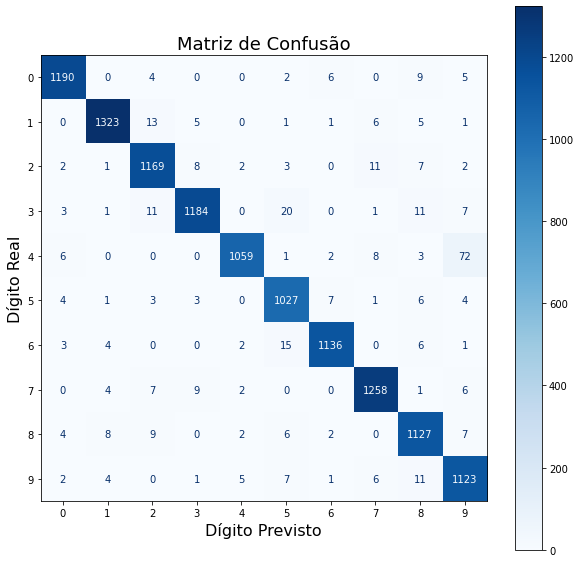

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1216
           1       0.98      0.98      0.98      1355
           2       0.96      0.97      0.97      1205
           3       0.98      0.96      0.97      1238
           4       0.99      0.92      0.95      1151
           5       0.95      0.97      0.96      1056
           6       0.98      0.97      0.98      1167
           7       0.97      0.98      0.98      1287
           8       0.95      0.97      0.96      1165
           9       0.91      0.97      0.94      1160

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [19]:
pred_2 = model_2.predict(x_test.reshape(-1,28,28))
pred_2 = argmax(pred_2, axis=1)
check(y_test, pred_2)

Este modelo obteve uma melhor perfomance, mantendo 97% de acurácia e com o maior erro em recall do Nove com 94%, confundindo 9 com o Quatro 30 vezes e com o Sete 24 vezes

# **Validando o Modelo 2**

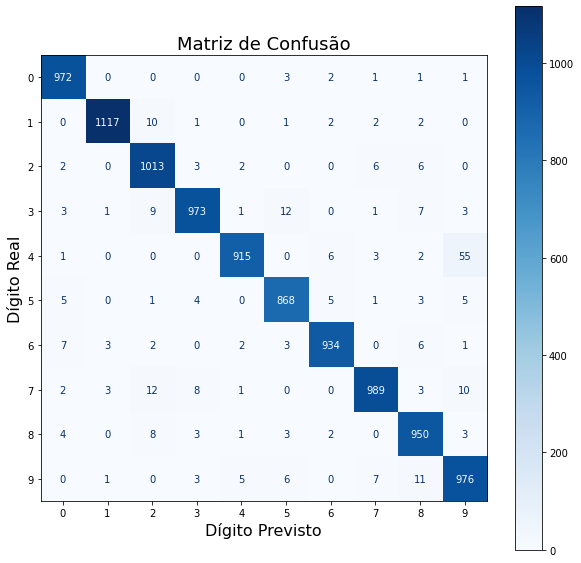

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.93      0.96       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [20]:
val_2 = model_2.predict(x_val.reshape(-1,28,28))
val_2 = argmax(val_2, axis=1)
check(y_val, val_2)

já na fase de validação o Sete teve uma precisão menor, sendo confundido com o Nove e também com o Dois

# **Modelo 3 -  Rede Neural Convolucional**

In [21]:
#definindo um stop
stop_cnn = keras.callbacks.EarlyStopping(
    monitor='accuracy', # por acuracia
    patience = 2, # terminar o treino após duas épocas sem melhoras 
    verbose = 1, #modo verbose nível 1
    mode='max',
    restore_best_weights=True
)

In [22]:
#criand o algoritmo
model_3 = Sequential()
model_3.add(Conv2D(filters=64, kernel_size=(3,3),
                   activation='relu', input_shape=(28,28,1)))# camada de entrada
model_3.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(BatchNormalization())    

model_3.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(BatchNormalization())
    
model_3.add(Flatten())
model_3.add(Dense(512,activation="relu"))
    
model_3.add(Dense(10,activation="softmax"))#camada de saída
    
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [23]:
model_3.fit(x_train.reshape(-1,28,28,1), y_train, epochs=40, callbacks= stop_cnn)

Epoch 1/40


2022-05-09 13:25:54.176439: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1500/1500 [==============================] - 13s 4ms/step - loss: 0.1066 - accuracy: 0.9673
Epoch 2/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 3/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0408 - accuracy: 0.9881
Epoch 4/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0322 - accuracy: 0.9908
Epoch 5/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 6/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 7/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9942
Epoch 8/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 9/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0148 - accuracy: 0.9956
Epoch 10/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0158 - accura

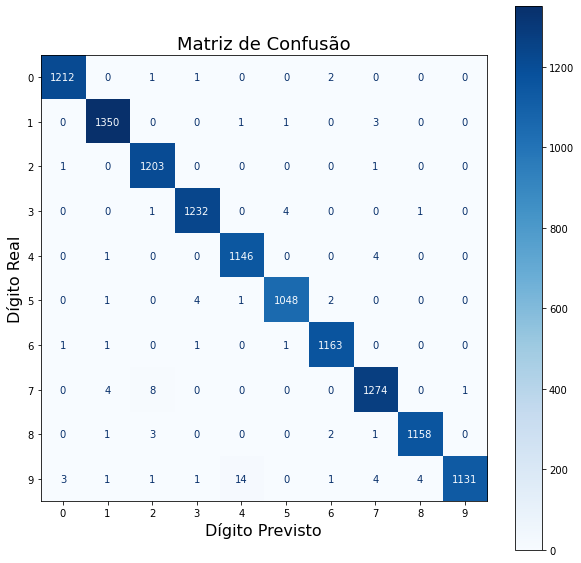

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      1.00      0.99      1355
           2       0.99      1.00      0.99      1205
           3       0.99      1.00      0.99      1238
           4       0.99      1.00      0.99      1151
           5       0.99      0.99      0.99      1056
           6       0.99      1.00      1.00      1167
           7       0.99      0.99      0.99      1287
           8       1.00      0.99      0.99      1165
           9       1.00      0.97      0.99      1160

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [24]:
pred_3 = model_3.predict(x_test.reshape(-1,28,28,1))
pred_3 = argmax(pred_3, axis=1)
check(y_test, pred_3)

# Validando o Modelo 3

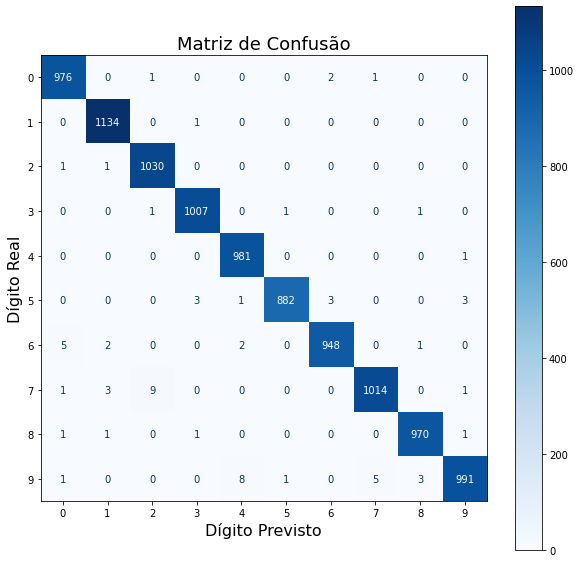

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
val_3 = model_3.predict(x_val.reshape(-1,28,28,1))
val_3 = argmax(val_3, axis=1)
check(y_val, val_3)

O modelo3 conseguiu quase 100% de acurácia,sendo o que mais acertou em todos os quesitos.

# Visualizando as 20 primeiras predições

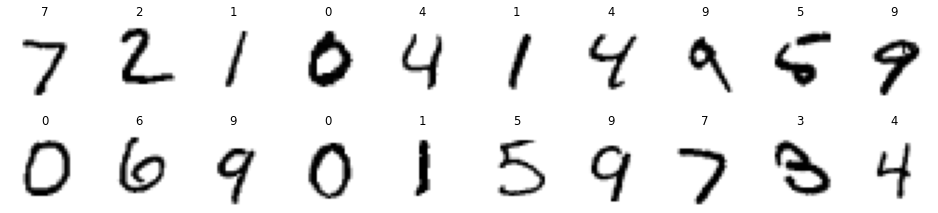

In [26]:
plt.figure(figsize=(16,4), dpi=60)
a,b = 10,2
for i in range(20):
  plt.subplot(b,a,i+1)
  plt.imshow(x_val[i].reshape((28,28)), cmap='binary')
  plt.title( val_3[i], fontsize=14)
  plt.axis('off')
  plt.tight_layout(pad=2.0)
plt.show()

Dentre os três algoritmos testados, o modelo 3 teve a maior perfomance, sendo assim o vencedor.

# Conclusões

Os algoritmos de redes neurais se mostram extremamente eficientes ao reconhecer padrões de imagem, sendo utilizado nas mais diversas áreas nos dias atuais.